In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
#Loading the Boston Housing Dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
    "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
boston_data = pd.read_csv(url, sep="\s+", header=None, names=columns)

#Displaying dataset information
print("Dataset loaded successfully!")
print(f"Dataset shape: {boston_data.shape}")
print("First 5 rows:")
print(boston_data.head())

Dataset loaded successfully!
Dataset shape: (506, 14)
First 5 rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
# Features (X) and Target (y)
X = boston_data.drop(columns=["MEDV"])  # MEDV is the target
y = boston_data["MEDV"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions and calculate evaluation metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 6.21
R-squared (R²): 0.92


In [ ]:
# Feature Importance
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
    Feature  Importance
5        RM    0.417416
12    LSTAT    0.374326
7       DIS    0.074700
4       NOX    0.032868
10  PTRATIO    0.030102
0      CRIM    0.025945
6       AGE    0.015439
9       TAX    0.011406
11        B    0.010591
2     INDUS    0.004247
8       RAD    0.002074
1        ZN    0.000722
3      CHAS    0.000164


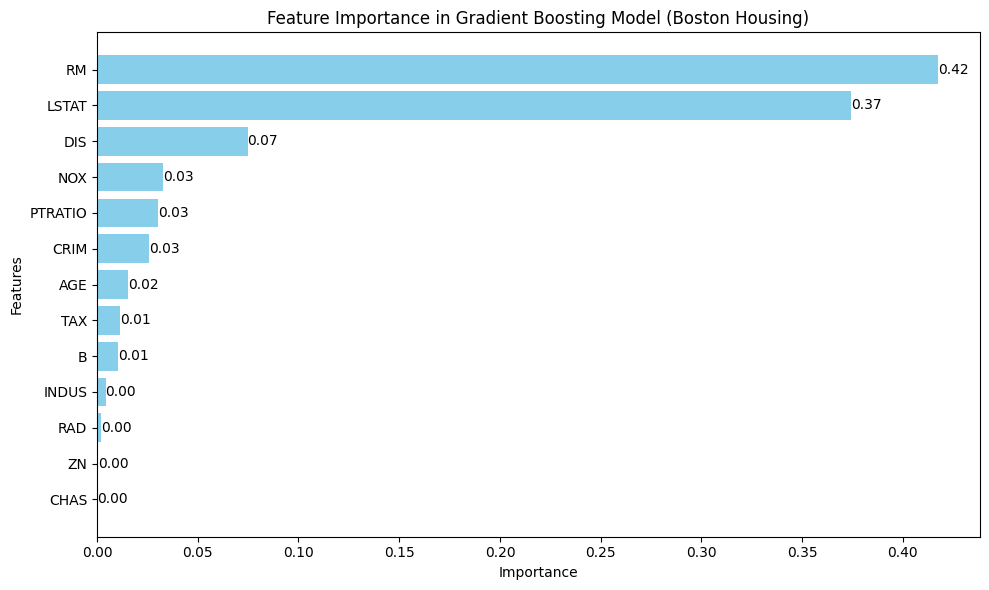

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance in Gradient Boosting Model (Boston Housing)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Display the most important feature at the top

# Add numerical values to bars
for i, v in enumerate(importance_df['Importance']):
    plt.text(v, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()